## 1. rész: A Python csomagok importálása

Ebben a részben a következő, a labor további részéhez szükséges Python csomagokat importáljuk.

#### numpy 
A NumPy a tudományos számítások alapvető csomagja Python nyelven. Többek között tartalmaz: egy nagy teljesítményű N-dimenziós tömbobjektumot és függvényeket.

#### pandas 
A Pandas egy nyílt forráskódú, BSD licenc alatt álló könyvtár, amely nagy teljesítményű, könnyen használható adatstruktúrákat és adatelemző eszközöket biztosít a Python programozási nyelvhez.

#### matplotlib
A Matplotlib egy ábrázoló könyvtár a Python programozási nyelvhez és annak numerikus matematikai kiterjesztéséhez, a NumPy-hoz.

#### folium 
A Foluim egy könyvtár interaktív térképek készítésére.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium 

## 2. rész: Az adatok betöltése

Ebben a részben betöltjük a San Francisco-i bűnügyi adatállományt és az elemzéshez és megjelenítéshez szükséges Python-csomagokat.

#### 1. lépés: Töltse be a San Francisco Crime adatokat egy adatkeretbe.
Ebben a lépésben a San Francisco-i bűnözési adatokat egy vesszőkkel elválasztott értékek (csv) fájlból importálja egy adatkeretbe.

In [4]:
# This should be a local path
dataset_path = './Data/Map-Crime_Incidents-Previous_Three_Months.csv'

# read the original dataset (in comma separated values format) into a DataFrame
SF = pd.read_csv(dataset_path)

#### 2. lépés: Az importált adatok megtekintése.

a) Az adatkeret változójának nevét egy cellába beírva strukturáltan megjelenítheti a felső és alsó sorokat.
A -n opció a head parancsban azt jelzi, hogy hány sort szeretnénk megjeleníteni a fájl elejéről. Ebben az esetben az -n 5 azt jelenti, hogy az első 5 sort jeleníti meg.

In [5]:
!head -n 5 ./Data/Map-Crime_Incidents-Previous_Three_Months.csv

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417392830334,37.7909741243888,"(37.7909741243888, -122.417392830334)"
,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404417620748,37.7963018736036,"(37.7963018736036, -122.404417620748)"
,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406958660602,37.7894347630337,"(37.7894347630337, -122.406958660602)"
,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419671780296,37.7650501214965,"(37.7650501214965, -122.419671780296)"


A pd.set_option('display.max_rows', 10) beállítás a pandas könyvtárban azt jelenti, hogy a DataFrame-ek megjelenítésekor maximum 10 sort fog megjeleníteni. Ez hasznos lehet, ha nagy adatkeretekkel dolgozol, és csak egy részletet szeretnél látni belőlük.

In [6]:
pd.set_option('display.max_rows', 10) #Visualize 10 rows 
SF

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,NaN,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)"
1,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)"
2,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)"
3,NaN,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)"
4,NaN,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)"
...,...,...,...,...,...,...,...,...,...,...,...,...
30755,NaN,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Sunday,06/01/2014 07:00:00 AM +0000,15:30,SOUTHERN,"ARREST, BOOKED",900.0 Block of MARKET ST,-122.408052,37.783957,"(37.7839574642528, -122.408051765969)"
30756,NaN,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,06/01/2014 07:00:00 AM +0000,16:00,NORTHERN,"ARREST, CITED",POLK ST / MCALLISTER ST,-122.418601,37.780261,"(37.7802607511488, -122.418600974625)"
30757,NaN,ASSAULT,BATTERY,Sunday,06/01/2014 07:00:00 AM +0000,15:00,TENDERLOIN,"ARREST, CITED",0.0 Block of JONES ST,-122.412122,37.781379,"(37.7813786419025, -122.412121608136)"
30758,NaN,ASSAULT,ASSAULT WITH CAUSTIC CHEMICALS,Sunday,06/01/2014 07:00:00 AM +0000,15:20,CENTRAL,NONE,200.0 Block of GEARY ST,-122.407434,37.787494,"(37.7874944447786, -122.407434204569)"


b) Használja az `columns` függvényt a DataFrame változók - oszlop nevek megtekintéséhez.

In [7]:
SF.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location'],
      dtype='object')

Hány változót tartalmaz az SF adatkeret (az indexet figyelmen kívül hagyva)?

Az SF adatkeret 12 változóból (12 oszlopból) áll.

c) Use the function `len` to determine the number of rows in the dataset.

In [8]:
len(SF)

30760

## 3. rész: Az adatok előkészítése

Most, hogy az adatokat betöltötte a munkakörnyezetbe, és meghatározta az elvégzendő elemzést, ideje előkészíteni az adatokat az elemzéshez.


#### 1. lépés: Szedje ki a hónapot és a napot a Dátum mezőből.

A `lambda` egy Python kulcsszó az úgynevezett *anonim függvények* definiálására. A `lambda` lehetővé teszi, hogy egy függvényt egy sor kódban adjunk meg, a `def` használata nélkül, és anélkül, hogy konkrét nevet definiálnánk neki. A `lambda` kifejezés szintaxisa a következő:

`lambda` *paraméterek* : *kifejezés*.

A következőkben a `lambda` függvényt egy olyan inline függvény létrehozására használjuk, amely csak a hónap számjegyeit választja ki a Date változóból, az `int` pedig a string ábrázolás egész számmá alakítására. Ezután a *pandas* `apply` függvényt arra használjuk, hogy ezt a függvényt egy teljes oszlopra alkalmazzuk (a gyakorlatban az `apply` implicit módon egy `for` ciklus definiál, és egyenként adja át a sorokat a `lambda` függvénynek).  Ugyanez az eljárás elvégezhető a Day esetében is. 

In [12]:
SF['Date']

0        08/31/2014 07:00:00 AM +0000
1        08/31/2014 07:00:00 AM +0000
2        08/31/2014 07:00:00 AM +0000
3        08/31/2014 07:00:00 AM +0000
4        08/31/2014 07:00:00 AM +0000
                     ...             
30755    06/01/2014 07:00:00 AM +0000
30756    06/01/2014 07:00:00 AM +0000
30757    06/01/2014 07:00:00 AM +0000
30758    06/01/2014 07:00:00 AM +0000
30759    06/01/2014 07:00:00 AM +0000
Name: Date, Length: 30760, dtype: object

In [14]:
SF['Month'] = SF['Date'].apply(lambda row: int(row[0:2]))
SF['Day'] = SF['Date'].apply(lambda row: int(row[3:5]))
SF.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month,Day
0,NaN,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)",8,31
1,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)",8,31
2,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)",8,31
3,NaN,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)",8,31
4,NaN,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)",8,31


SF['Date'] kiválasztja a Date oszlopot a SF DataFrame-ből.
.apply(lambda row: int(row[0:2])) minden egyes dátum értékre alkalmaz egy lambda függvényt, amely:
row[0:2] kivágja az első két karaktert (a hónapot).
int() egész számmá alakítja a kivágott karaktereket.
Az eredményt az új Month oszlopba menti.

Annak ellenőrzéséhez, hogy ez a két változó hozzá lett-e adva az SF adatkerethez, használjuk a `print` függvényt néhány érték kiírásához ezekből az oszlopokból, és a `type` függvényt annak ellenőrzéséhez, hogy ezek az új oszlopok valóban numerikus értékeket tartalmaznak-e.

In [15]:
print(SF['Month'][0:2])
print(SF['Day'][0:2])

0    8
1    8
Name: Month, dtype: int64
0    31
1    31
Name: Day, dtype: int64


SF['Month'] kiválasztja a Month oszlopot a SF DataFrame-ből.
[0:2] az oszlop első két elemét választja ki.
print() kiírja ezeket az elemeket a konzolra.

In [17]:
print(type(SF['Month'][0]))
SF

<class 'numpy.int64'>


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month,Day
0,NaN,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)",8,31
1,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)",8,31
2,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)",8,31
3,NaN,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)",8,31
4,NaN,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)",8,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30755,NaN,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Sunday,06/01/2014 07:00:00 AM +0000,15:30,SOUTHERN,"ARREST, BOOKED",900.0 Block of MARKET ST,-122.408052,37.783957,"(37.7839574642528, -122.408051765969)",6,1
30756,NaN,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,06/01/2014 07:00:00 AM +0000,16:00,NORTHERN,"ARREST, CITED",POLK ST / MCALLISTER ST,-122.418601,37.780261,"(37.7802607511488, -122.418600974625)",6,1
30757,NaN,ASSAULT,BATTERY,Sunday,06/01/2014 07:00:00 AM +0000,15:00,TENDERLOIN,"ARREST, CITED",0.0 Block of JONES ST,-122.412122,37.781379,"(37.7813786419025, -122.412121608136)",6,1
30758,NaN,ASSAULT,ASSAULT WITH CAUSTIC CHEMICALS,Sunday,06/01/2014 07:00:00 AM +0000,15:20,CENTRAL,NONE,200.0 Block of GEARY ST,-122.407434,37.787494,"(37.7874944447786, -122.407434204569)",6,1


SF['Month'] kiválasztja a Month oszlopot a SF DataFrame-ből.
[0] az oszlop első elemét választja ki.
type() meghatározza az első elem típusát.
print() kiírja az elem típusát a konzolra.

#### 2. lépés: Változók eltávolítása az SF adatkeretből.

a) Az `IncidntNum` oszlop sok NaN-t tartalmazó cellát tartalmaz. Ebben az esetben az adatok hiányoznak. Továbbá az `IncidntNum` nem szolgáltat semmilyen értéket az elemzéshez. Az oszlop törölhető az adatkeretből. A nem kívánt változók eltávolításának egyik módja az adatkeretben a `del` függvény használata.

In [21]:
#del SF['IncidntNum']
SF.to_csv('test.csv')

Az IncidntNum általában az incidens számát vagy azonosítóját jelenti egy adatbázisban vagy adatkeretben. Ebben az esetben valószínűleg egy egyedi azonosító számot tartalmaz minden egyes bűncselekmény incidenshez a SF DataFrame-ben.

SF a DataFrame, amelyből az oszlopot törölni szeretnéd.
del a Python kulcsszó, amely törli a megadott objektumot.
SF['IncidntNum'] az IncidntNum oszlopot jelöli a SF DataFrame-ben.

b) Hasonlóképpen, a "location" attribútum nem szerepel ebben az elemzésben. Ez elhagyható az adatkeretből. 
<p>Alternatívaként használhatja az `drop` függvényt az adatkereten, megadva, hogy az *axis* is the 1 (0 for rows), és hogy a parancs nem igényel hozzárendelést egy másik értékhez az eredmény tárolásához (*inplace = True* ).

In [22]:
SF.drop('Location', axis=1, inplace=True)

In [23]:
SF

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,8,31
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,8,31
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,8,31
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,8,31
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,8,31
...,...,...,...,...,...,...,...,...,...,...,...,...
30755,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Sunday,06/01/2014 07:00:00 AM +0000,15:30,SOUTHERN,"ARREST, BOOKED",900.0 Block of MARKET ST,-122.408052,37.783957,6,1
30756,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,06/01/2014 07:00:00 AM +0000,16:00,NORTHERN,"ARREST, CITED",POLK ST / MCALLISTER ST,-122.418601,37.780261,6,1
30757,ASSAULT,BATTERY,Sunday,06/01/2014 07:00:00 AM +0000,15:00,TENDERLOIN,"ARREST, CITED",0.0 Block of JONES ST,-122.412122,37.781379,6,1
30758,ASSAULT,ASSAULT WITH CAUSTIC CHEMICALS,Sunday,06/01/2014 07:00:00 AM +0000,15:20,CENTRAL,NONE,200.0 Block of GEARY ST,-122.407434,37.787494,6,1


SF.drop('Location', axis=1, inplace=True) meghívja a drop metódust a SF DataFrame-en.
'Location' az oszlop neve, amelyet törölni szeretnél.
axis=1 azt jelzi, hogy egy oszlopot törölsz (nem egy sort).
inplace=True azt jelenti, hogy a törlés közvetlenül a SF DataFrame-en történik, és nem hoz létre egy új DataFrame-et.

c) Ellenőrizze, hogy az oszlopok eltávolításra kerültek-e.

In [28]:
SF

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,8,31
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,8,31
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,8,31
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,8,31
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,8,31
...,...,...,...,...,...,...,...,...,...,...,...,...
30755,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Sunday,06/01/2014 07:00:00 AM +0000,15:30,SOUTHERN,"ARREST, BOOKED",900.0 Block of MARKET ST,-122.408052,37.783957,6,1
30756,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,06/01/2014 07:00:00 AM +0000,16:00,NORTHERN,"ARREST, CITED",POLK ST / MCALLISTER ST,-122.418601,37.780261,6,1
30757,ASSAULT,BATTERY,Sunday,06/01/2014 07:00:00 AM +0000,15:00,TENDERLOIN,"ARREST, CITED",0.0 Block of JONES ST,-122.412122,37.781379,6,1
30758,ASSAULT,ASSAULT WITH CAUSTIC CHEMICALS,Sunday,06/01/2014 07:00:00 AM +0000,15:20,CENTRAL,NONE,200.0 Block of GEARY ST,-122.407434,37.787494,6,1


## 4. rész: Az adatok elemzése

Most, hogy az adatkeret elkészült az adatokkal, itt az ideje az adatok elemzésének. 

#### 1. lépés: A változók összegzése a statisztikai információk megszerzése érdekében.

a) Az `value_counts` függvénnyel összegezze az elkövetett bűncselekmények számát típusonként, majd a `print` függvénnyel jelenítse meg a *CountCategory* változó tartalmát.

In [29]:
CountCategory = SF['Category'].value_counts()
print(CountCategory)

Category
LARCENY/THEFT                 8205
OTHER OFFENSES                4004
NON-CRIMINAL                  3653
ASSAULT                       2518
VEHICLE THEFT                 1885
                              ... 
SEX OFFENSES, NON FORCIBLE       5
BAD CHECKS                       3
GAMBLING                         1
PORNOGRAPHY/OBSCENE MAT          1
BRIBERY                          1
Name: count, Length: 36, dtype: int64


Ez a kód megszámolja, hogy az egyes kategóriák hányszor fordulnak elő a SF DataFrame Category oszlopában, majd kiírja az eredményt.
SF['Category'] kiválasztja a Category oszlopot a SF DataFrame-ből.
.value_counts() megszámolja, hogy az egyes kategóriák hányszor fordulnak elő az oszlopban.
Az eredményt a CountCategory változóba menti.
print(CountCategory) kiírja a CountCategory változó tartalmát a konzolra.

b) Alapértelmezés szerint a számlálások csökkenő sorrendben vannak elrendezve. Az opcionális *ascending* paraméter értéke *True*-ra állítható, hogy ez a viselkedés megforduljon.

In [30]:
SF['Category'].value_counts(ascending=True)

Category
PORNOGRAPHY/OBSCENE MAT          1
GAMBLING                         1
BRIBERY                          1
BAD CHECKS                       3
SEX OFFENSES, NON FORCIBLE       5
                              ... 
VEHICLE THEFT                 1885
ASSAULT                       2518
NON-CRIMINAL                  3653
OTHER OFFENSES                4004
LARCENY/THEFT                 8205
Name: count, Length: 36, dtype: int64

Milyen típusú bűncselekményt követtek el a legtöbbet?

Larceny/theft was committed the most.
A legtöbbet lopást/lopást követtek el.

c) Ha a két függvényt egy parancsba ágyazza, ugyanazt az eredményt egyetlen sornyi
kódsorral.

In [31]:
print(SF['Category'].value_counts(ascending=True))

Category
PORNOGRAPHY/OBSCENE MAT          1
GAMBLING                         1
BRIBERY                          1
BAD CHECKS                       3
SEX OFFENSES, NON FORCIBLE       5
                              ... 
VEHICLE THEFT                 1885
ASSAULT                       2518
NON-CRIMINAL                  3653
OTHER OFFENSES                4004
LARCENY/THEFT                 8205
Name: count, Length: 36, dtype: int64


Ez a kód megszámolja, hogy az egyes kategóriák hányszor fordulnak elő a SF DataFrame Category oszlopában, majd kiírja az eredményt növekvő sorrendben.
F['Category'] kiválasztja a Category oszlopot a SF DataFrame-ből.
.value_counts(ascending=True) megszámolja, hogy az egyes kategóriák hányszor fordulnak elő az oszlopban, és az eredményt növekvő sorrendben rendezi.
print() kiírja az eredményt a konzolra.

**Kihívás kérdése**: Melyik PdD kerületben volt a legtöbb bejelentett bűncselekmény? Adja meg a Python-parancsot (parancsokat)
amelyet a válasz alátámasztására használt.

A déli kerületben volt a legtöbb bejelentett bűncselekmény.
print(SF['PdDistrict'].value_counts(ascending=True))

In [ ]:
print(SF['PdDistrict'].value_counts(ascending=True))

Ez a kód megszámolja, hogy az egyes rendőrségi körzetek (PdDistrict) hányszor fordulnak elő a SF DataFrame PdDistrict oszlopában, majd kiírja az eredményt növekvő sorrendben.
SF['PdDistrict'] kiválasztja a PdDistrict oszlopot a SF DataFrame-ből.
.value_counts(ascending=True) megszámolja, hogy az egyes rendőrségi körzetek hányszor fordulnak elő az oszlopban, és az eredményt növekvő sorrendben rendezi.
print() kiírja az eredményt a konzolra.

#### 2. lépés: Az adatok kisebb adatkeretekre történő alcsoportosítása.

a) A logikai indexeléssel csak azokat a sorokat lehet kiválasztani, amelyek esetében egy adott feltétel teljesül. A következő kód például csak az augusztusban elkövetett bűncselekményeket választja ki, és az eredményt egy új DataFrame-ben tárolja.

In [32]:
AugustCrimes = SF[SF['Month'] == 8]
AugustCrimes

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,8,31
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,8,31
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,8,31
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,8,31
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,8,31
...,...,...,...,...,...,...,...,...,...,...,...,...
9715,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Friday,08/01/2014 07:00:00 AM +0000,19:55,MISSION,NONE,1100.0 Block of POTRERO AV,-122.406497,37.754279,8,1
9716,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Friday,08/01/2014 07:00:00 AM +0000,22:47,RICHMOND,NONE,1500.0 Block of BRODERICK ST,-122.441458,37.784427,8,1
9717,ASSAULT,THREATS AGAINST LIFE,Friday,08/01/2014 07:00:00 AM +0000,23:55,BAYVIEW,NONE,400.0 Block of TUNNEL AV,-122.401364,37.709748,8,1
9718,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Friday,08/01/2014 07:00:00 AM +0000,23:38,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,8,1


z a kód létrehoz egy új DataFrame-et, amely csak azokat a sorokat tartalmazza a SF DataFrame-ből, ahol a Month oszlop értéke 8 (azaz augusztus).
SF['Month'] == 8 egy logikai feltételt hoz létre, amely igaz azokra a sorokra, ahol a Month oszlop értéke 8.
SF[SF['Month'] == 8] kiválasztja azokat a sorokat a SF DataFrame-ből, amelyek megfelelnek a feltételnek.
Az eredményt az AugustCrimes változóba menti.

Hány bűncselekmény történt augusztusban? 

Augusztusban 9720 bűncselekményt jelentettek.

Hány betöréses lopást jelentettek augusztus hónapban?

Augusztusban 1257 betöréses lopást jelentettek.

In [34]:
AugustCrimes = SF[SF['Month'] == 8]
AugustCrimesB = AugustCrimes[AugustCrimes['Category'] == 'BURGLARY']
len(AugustCrimesB)

373

Ez a kód két új DataFrame-et hoz létre a SF DataFrame-ből, majd megszámolja az egyik DataFrame sorainak számát.
[AugustCrimes = SF[SF['Month'] == 8]](http://vscodecontentref/1): Létrehoz egy új DataFrame-et, amely csak azokat a sorokat tartalmazza, ahol a Month oszlop értéke 8 (augusztus).
[AugustCrimesB = SF[SF['Category'] == 'BURGLARY']](http://vscodecontentref/2): Létrehoz egy új DataFrame-et, amely csak azokat a sorokat tartalmazza, ahol a Category oszlop értéke 'BURGLARY' (betörés).
len(AugustCrimesB): Megszámolja az AugustCrimesB DataFrame sorainak számát, és visszaadja ezt az értéket.

b) Az SF adatkeret egy adott napra vonatkozó részhalmazának létrehozásához használja a "query" függvény operandusát a hónap és a nap egyidejű összehasonlítására.

In [36]:
Crime0704 = SF.query('Month == 7 and Day == 4')
len(Crime0704)

341

Ez a kód létrehoz egy új DataFrame-et, amely csak azokat a sorokat tartalmazza a SF DataFrame-ből, ahol a Month oszlop értéke 7 (július) és a Day oszlop értéke 4 (negyedik nap).
SF.query('Month == 7 and Day == 4'): Kiválasztja azokat a sorokat a SF DataFrame-ből, ahol a Month oszlop értéke 7 és a Day oszlop értéke 4.
Az eredményt a Crime0704 változóba menti.
Crime0704: Kiírja a Crime0704 DataFrame tartalmát a konzolra.

In [39]:
SF.columns

Index(['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Month', 'Day'],
      dtype='object')

## 5. rész: Az adatok bemutatása

Az adatok vizualizálása és bemutatása azonnali áttekintést nyújt, ami nem feltétlenül tűnik fel, ha egyszerűen
a nyers adatok megtekintése. Az SF adatkeret hosszúsági és szélességi koordinátákat tartalmaz, amelyek felhasználhatók a következőkhöz
az adatok ábrázolásához.

#### 1. lépés: Ábrázolja az SF adatkeret grafikonját az X és Y változók segítségével.

a) Használja a `plot()` függvényt az SF adatkeret ábrázolásához. Az opcionális paraméterrel a grafikon piros színnel ábrázolható, a jelölő alakját pedig a *ro* segítségével körré állíthatja be.

In [41]:
#matplotlib.pyplot plt
SF.columns
SF['X']

0       -122.417393
1       -122.404418
2       -122.406959
3       -122.419672
4       -122.417904
            ...    
30755   -122.408052
30756   -122.418601
30757   -122.412122
30758   -122.407434
30759   -122.426391
Name: X, Length: 30760, dtype: float64

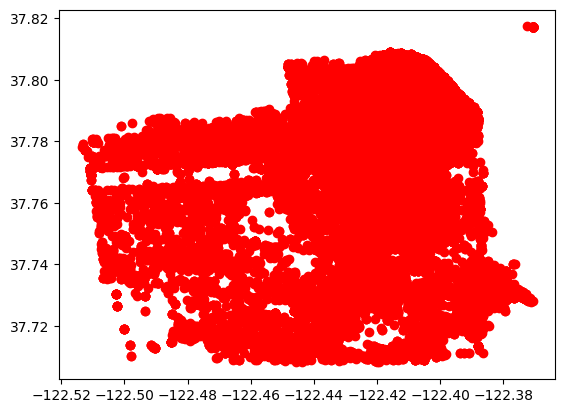

In [ ]:
plt.plot(SF['X'],SF['Y'], 'ro')
plt.show()

b) Azonosítsuk a rendőrségi körzetek számát, majd hozzuk létre a *pd_districts* szótárat, hogy a stringjüket egy egész számhoz társítsuk.

Ez a kód egy scatter plotot (szórt diagramot) hoz létre a SF DataFrame X és Y oszlopainak adataiból, majd megjeleníti a diagramot.
import matplotlib.pyplot as plt: Importálja a matplotlib.pyplot könyvtárat plt néven.
plt.plot(SF['X'], SF['Y'], 'ro'): Létrehoz egy scatter plotot a SF DataFrame X és Y oszlopainak adataiból, piros körökkel ('ro').
plt.show(): Megjeleníti a diagramot.

In [44]:
pd_districts = np.unique(SF['PdDistrict'])

pd_districts_levels = dict(zip(pd_districts, range(len(pd_districts))))
pd_districts_levels

{'BAYVIEW': 0,
 'CENTRAL': 1,
 'INGLESIDE': 2,
 'MISSION': 3,
 'NORTHERN': 4,
 'PARK': 5,
 'RICHMOND': 6,
 'SOUTHERN': 7,
 'TARAVAL': 8,
 'TENDERLOIN': 9}

Ez a kód az egyedi rendőrségi körzeteket (PdDistrict) azonosítja a SF DataFrame-ben, majd egy szótárat hoz létre, amely minden egyes körzethez egy egyedi szintet (számot) rendel.
np.unique(SF['PdDistrict']): Azonosítja az egyedi értékeket a SF DataFrame PdDistrict oszlopában.
dict(zip(pd_districts, range(len(pd_districts)))): Egy szótárat hoz létre, amely az egyedi körzeteket (kulcsok) egy egyedi számmal (értékek) párosítja.
pd_districts_levels: Kiírja a létrehozott szótárat.

c) Használja az `apply` és a `lambda` parancsot, hogy a rendőrség egész számú azonosítóját hozzáadja a DataFrame egy új oszlopához. 

In [45]:
SF['PdDistrictCode'] = SF['PdDistrict'].apply(lambda row: pd_districts_levels[row])

In [46]:
SF.head(5)

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day,PdDistrictCode
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,8,31,1
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,8,31,1
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,8,31,1
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,8,31,3
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,8,31,4


Ez a kód egy új oszlopot (PdDistrictCode) hoz létre a SF DataFrame-ben, amely a PdDistrict oszlop értékeit egyedi kódokra (számokra) cseréli a pd_districts_levels szótár alapján.
SF['PdDistrict'] kiválasztja a PdDistrict oszlopot a SF DataFrame-ből.
.apply(lambda row: pd_districts_levels[row]) minden egyes értékre alkalmaz egy lambda függvényt, amely a pd_districts_levels szótár alapján kicseréli az értéket a megfelelő kódra.
Az eredményt az új PdDistrictCode oszlopba menti.


d) Használja az újonnan létrehozott *PdDistrictCode*-t a szín automatikus megváltoztatásához.

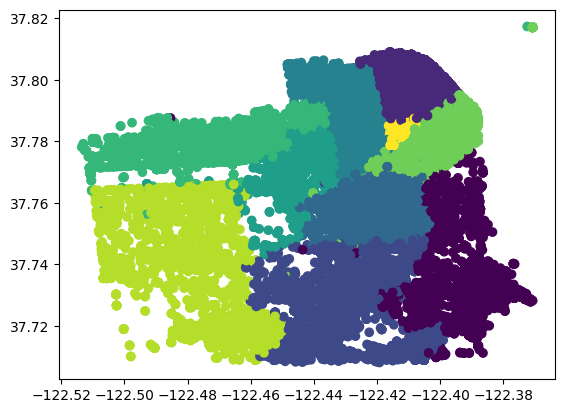

In [47]:
plt.scatter(SF['X'], SF['Y'], c=SF['PdDistrictCode'])
plt.show()

Ez a kód egy scatter plotot (szórt diagramot) hoz létre a SF DataFrame X és Y oszlopainak adataiból, ahol az adatpontok színe a PdDistrictCode oszlop értékei alapján változik. Végül megjeleníti a diagramot.
import matplotlib.pyplot as plt: Importálja a matplotlib.pyplot könyvtárat plt néven.
plt.scatter(SF['X'], SF['Y'], c=SF['PdDistrictCode']): Létrehoz egy scatter plotot a SF DataFrame X és Y oszlopainak adataiból, ahol az adatpontok színe a PdDistrictCode oszlop értékei alapján változik.
plt.show(): Megjeleníti a diagramot.


#### 2. lépés: Adjon hozzá térképcsomagokat a grafika bővítéséhez.

Az 1. lépésben létrehozott egy egyszerű ábrát, amely megmutatja, hogy SF megyében hol történtek bűncselekmények. Ez a diagram
hasznos, de a `folium` további funkciókat biztosít, amelyek lehetővé teszik, hogy ezt a grafikont egy OpenStreet-térképre helyezze. 

a) A `Folium` a jelölő színét hexadecimális értékkel kell megadni. Ezért használjuk a *colors* csomagot, és válasszuk ki a szükséges színeket.

In [48]:
from matplotlib import colors
districts = np.unique(SF['PdDistrict'])
print(list(colors.cnames.values())[0:len(districts)]) 

['#F0F8FF', '#FAEBD7', '#00FFFF', '#7FFFD4', '#F0FFFF', '#F5F5DC', '#FFE4C4', '#000000', '#FFEBCD', '#0000FF']


Ez a kód importálja a colors modult a matplotlib könyvtárból, azonosítja az egyedi rendőrségi körzeteket (PdDistrict), majd kiírja a matplotlib által definiált színek listájának első len(districts) elemét.

rom matplotlib import colors: Importálja a colors modult a matplotlib könyvtárból.
districts = np.unique(SF['PdDistrict']): Azonosítja az egyedi értékeket a SF DataFrame PdDistrict oszlopában.
list(colors.cnames.values())[0:len(districts)]: Kiválasztja a matplotlib által definiált színek listájának első len(districts) elemét.
print(...): Kiírja a kiválasztott színeket a konzolra.


b) Készítsen színszótárat minden rendőrségi körzethez.

In [49]:
color_dict = dict(zip(districts, list(colors.cnames.values())[0:-1:len(districts)])) 
color_dict

{'BAYVIEW': '#F0F8FF',
 'CENTRAL': '#8A2BE2',
 'INGLESIDE': '#00FFFF',
 'MISSION': '#FF8C00',
 'NORTHERN': '#FF1493',
 'PARK': '#F8F8FF',
 'RICHMOND': '#4B0082',
 'SOUTHERN': '#FAFAD2',
 'TARAVAL': '#B0C4DE',
 'TENDERLOIN': '#9370DB'}

Ez a kód létrehoz egy szótárat (color_dict), amely az egyedi rendőrségi körzeteket (districts) színekhez rendeli a matplotlib által definiált színek listájából. Azonban a list(colors.cnames.values())[0:-1:len(districts)] szintaxis hibás, mert az utolsó lépés paraméterének helyes használata az intervallumot adja meg.

list(colors.cnames.values()): A matplotlib által definiált színek listája.
[:len(districts)]: Kiválasztja a színek listájának első len(districts) elemét.
zip(districts, ...): Párosítja az egyedi rendőrségi körzeteket a kiválasztott színekkel.
dict(...): Létrehoz egy szótárat a párosított értékekből.
color_dict: Kiírja a létrehozott szótárat.

c) Hozzuk létre a térképet az SF-adatok középső koordinátáinak felhasználásával a térkép középpontjához (a "középérték" használatával). A számítási idő csökkentése érdekében a *plotEvery* a kirajzolt adatok mennyiségének korlátozására szolgál. Állítsa ezt az értéket 1-re az összes sor kirajzolásához (a térkép megjelenítéséhez sok időbe telhet).

In [53]:
# Code cell 27
# Create map
map_osm = folium.Map(location=[SF['Y'].mean(), 
                               SF['X'].mean()], zoom_start = 12)
plotEvery = 10
obs = list(zip( SF['Y'], SF['X'], SF['PdDistrict'])) 

for el in obs[0:-1:plotEvery]: 
    
    folium.CircleMarker(el[0:2], color=color_dict[el[2]], 
                        fill_color=el[2],radius=10).add_to(map_osm)
map_osm
    

Ez a kód létrehoz egy interaktív térképet a folium könyvtár segítségével, és bizonyos időközönként (itt minden 50. adatpont) köröket rajzol a térképre a SF DataFrame adatai alapján. A körök színe a rendőrségi körzetekhez (PdDistrict) rendelt színek alapján változik.

folium.Map(location=[SF['Y'].mean(), SF['X'].mean()], zoom_start=12): Létrehoz egy térképet a bűncselekmények átlagos koordinátáival és egy alapértelmezett nagyítással.
plotEvery = 50: Meghatározza, hogy minden 50. adatpontot fogjuk megjeleníteni.
obs = list(zip(SF['Y'], SF['X'], SF['PdDistrict'])): Létrehozza az adatpontok listáját, amely tartalmazza az Y, X koordinátákat és a rendőrségi körzeteket.
for el in obs[0:-1:plotEvery]: Iterál az adatpontok listáján, minden 50. adatpontot kiválasztva.
folium.CircleMarker(el[0:2], color=color_dict[el[2]], fill=True, fill_color=color_dict[el[2]], radius=10).add_to(map_osm): Hozzáad egy kör alakú jelölőt a térképhez az adott koordinátákkal és színnel.
map_osm: Megjeleníti a térképet.

In [ ]:
map_osm

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>